# Machine Learning for Data Analysis
### Week 1: Running a Classification Tree

For the next few posts, I’ll be exploring machine learning techniques to help analyze the GapMinder data. To begin, I’ll create a classification tree to explore the relationship between my response variable, internet user rate, and my explanatory variables, income per person, employment rate, female employment rate, and polity score. The technique requires a binary, categorical response variable, so for the purpose of this demonstration I have binned internet use rate into two categories, High usage and Low usage, split by the median data point.

Load the data and convert the variables to numeric

In [1]:
'''
Code for Peer-graded Assignments: Running a Classification Tree
Course: Data Management and Visualization
Specialization: Data Analysis and Interpretation
'''
 
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
 
data = pd.read_csv('c:/users/greg/desktop/gapminder.csv', low_memory=False)
 
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')

Convert the response variable to binary

In [3]:
binarydata = data.copy()
 
def internetgrp (row):
    if row['internetuserate'] < data['internetuserate'].median():
        return 0
    else:
        return 1

binarydata['internetuserate'] = binarydata.apply (lambda row: internetgrp (row),axis=1)

Clean the data by discarding NA values

In [4]:
binarydata_clean = binarydata.dropna()
 
binarydata_clean.dtypes
binarydata_clean.describe()

,incomeperperson,femaleemployrate,internetuserate,polityscore,employrate
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,6706.556978,48.068421,0.453947,3.861842,59.212500
std,9823.592315,14.826857,0.499521,6.245581,10.363802
min,103.775857,12.400000,0.000000,-10.000000,34.900002
25%,560.797158,39.549999,0.000000,-2.000000,51.924999
50%,2225.931019,48.549999,0.000000,7.000000,58.900002
75%,6905.287662,56.050000,1.000000,9.000000,65.000000
max,39972.352768,83.300003,1.000000,10.000000,83.199997


Split into training and testing sets

In [7]:
predictors = binarydata_clean[['incomeperperson','employrate','femaleemployrate','polityscore']]
 
targets = binarydata_clean.internetuserate
 
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
 
print ('Training sample')
print (pred_train.shape)
print ('')
print ('Testing sample')
print (pred_test.shape)
print ('')
print ('Training sample')
print (tar_train.shape)
print ('')
print ('Testing sample')
print (tar_test.shape)

Training sample
(91, 4)

Testing sample
(61, 4)

Training sample
(91,)

Testing sample
(61,)


Build model on the training data

In [8]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)
 
predictions=classifier.predict(pred_test)

Display the confusion matrix

In [10]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[22,  9],
       [ 8, 22]])

Display the accuracy score

In [11]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.72131147540983609

Display the decision tree

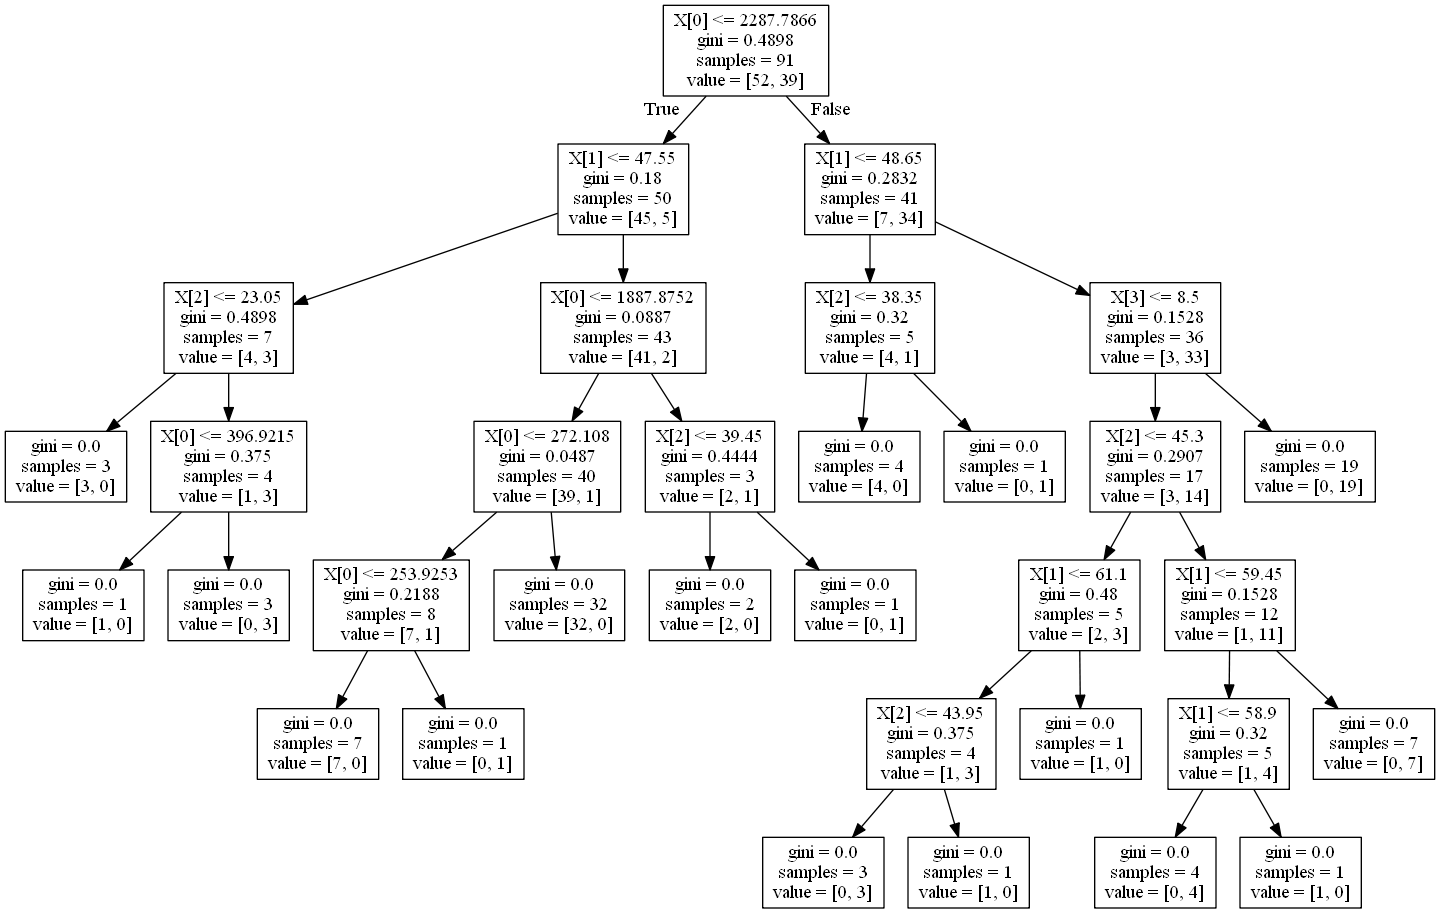

In [13]:
from sklearn import tree
from io import StringIO
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

The decision tree analysis was performed to test non-linear relationships among the explanatory variables and a single binary, categorical response variable. The training sample has 91 rows of data and 4 explanatory variables; the testing sample has 61 rows of data, and the same 4 explanatory variables. The decision tree results in 27 true negatives and 16 true positives; and 11 false negatives and 7 false positives. The accuracy score is 70.5%, meaning that the model accurately predicted 70.5% of the internet use rates per country.